# Analysis of US police shooting incidents (2015-2020)

# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import folium
import json
import plotly.express as px
%matplotlib inline

# Loading Dataset

In [2]:
#Reading the CSV file
data = pd.read_csv('shootings.csv')

In [3]:
#Printing the data frame
data.head()

id                name    date   manner_of_death       armed   age gender  \
0   3          Tim Elliot  1/2/15              shot         gun  53.0      M   
1   4    Lewis Lee Lembke  1/2/15              shot         gun  47.0      M   
2   5  John Paul Quintero  1/3/15  shot and Tasered     unarmed  23.0      M   
3   8     Matthew Hoffman  1/4/15              shot  toy weapon  32.0      M   
4   9   Michael Rodriguez  1/4/15              shot    nail gun  39.0      M   

       race           city state  signs_of_mental_illness threat_level  \
0     Asian        Shelton    WA                     True       attack   
1     White          Aloha    OR                    False       attack   
2  Hispanic        Wichita    KS                    False        other   
3     White  San Francisco    CA                     True       attack   
4  Hispanic          Evans    CO                    False       attack   

          flee  body_camera          arms_category  
0  Not fleeing        False                   Guns  
1  Not fleeing        False                   Guns  
2  Not fleeing        False                Unarmed  
3  Not fleeing        False  Other unusual objects  
4  Not fleeing        False       Piercing objects

In [4]:
#Counting the total number of rows and columns
data.shape

(4895, 15)

In [5]:
#Verifying the datatype of the columns
data.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
arms_category               object
dtype: object

In [6]:
data.describe()

id          age
count  4895.000000  4895.000000
mean   2902.148519    36.549750
std    1683.467910    12.694348
min       3.000000     6.000000
25%    1441.500000    27.000000
50%    2847.000000    35.000000
75%    4352.500000    45.000000
max    5925.000000    91.000000

# Checking Null Values

In [7]:
#Dropping rows with null values
data.dropna()

id                name     date   manner_of_death       armed   age  \
0        3          Tim Elliot   1/2/15              shot         gun  53.0   
1        4    Lewis Lee Lembke   1/2/15              shot         gun  47.0   
2        5  John Paul Quintero   1/3/15  shot and Tasered     unarmed  23.0   
3        8     Matthew Hoffman   1/4/15              shot  toy weapon  32.0   
4        9   Michael Rodriguez   1/4/15              shot    nail gun  39.0   
...    ...                 ...      ...               ...         ...   ...   
4890  5916     Rayshard Brooks  6/12/20              shot       Taser  27.0   
4891  5925      Caine Van Pelt  6/12/20              shot         gun  23.0   
4892  5918        Hannah Fizer  6/13/20              shot     unarmed  25.0   
4893  5921      William Slyter  6/13/20              shot         gun  22.0   
4894  5924      Nicholas Hirsh  6/15/20              shot         gun  31.0   

     gender      race           city state  signs_of_mental_illness  \
0         M     Asian        Shelton    WA                     True   
1         M     White          Aloha    OR                    False   
2         M  Hispanic        Wichita    KS                    False   
3         M     White  San Francisco    CA                     True   
4         M  Hispanic          Evans    CO                    False   
...     ...       ...            ...   ...                      ...   
4890      M     Black        Atlanta    GA                    False   
4891      M     Black    Crown Point    IN                    False   
4892      F     White        Sedalia    MO                    False   
4893      M     White    Kansas City    MO                    False   
4894      M     White       Lawrence    KS                    False   

     threat_level         flee  body_camera          arms_category  
0          attack  Not fleeing        False                   Guns  
1          attack  Not fleeing        False                   Guns  
2           other  Not fleeing        False                Unarmed  
3          attack  Not fleeing        False  Other unusual objects  
4          attack  Not fleeing        False       Piercing objects  
...           ...          ...          ...                    ...  
4890       attack         Foot         True     Electrical devices  
4891       attack          Car        False                   Guns  
4892        other  Not fleeing        False                Unarmed  
4893        other        Other        False                   Guns  
4894       attack          Car        False                   Guns  

[4895 rows x 15 columns]

In [8]:
#Verifying if any other null values are still present
data.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

# Visualisations

Graph 1 : Histogram for Distribution of Age vs Incident Count

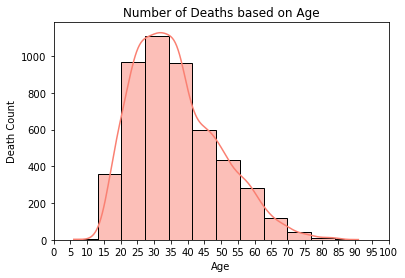

In [9]:
sns.histplot(data.age,bins=12,kde=True, color = 'salmon')
plt.xticks((range(0,101,5)))
plt.title('Number of Deaths based on Age')
plt.ylabel('Death Count')
plt.xlabel('Age')
plt.show()
#Majority of deaths happened between 25-45 years.

Graph 2 : Violin Plot for Distribution of Mental Illness based on Age and Gender

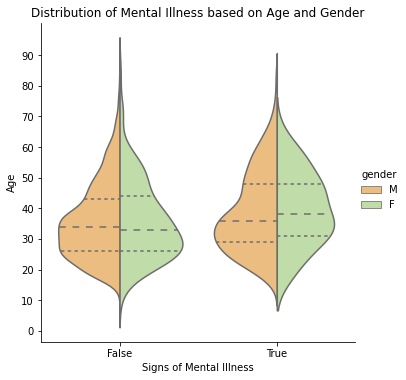

In [10]:
from numpy import mean
sns.catplot(x="signs_of_mental_illness", y="age",hue='gender', kind="violin",data=data,split=True, estimator=mean, palette="Spectral",inner="quartile",showmedians=True)
plt.yticks(np.arange(0,100,10))
plt.title('Distribution of Mental Illness based on Age and Gender')
plt.xlabel('Signs of Mental Illness')
plt.ylabel('Age')
plt.show()

Graph 3 : Pie Chart of Race Distribution

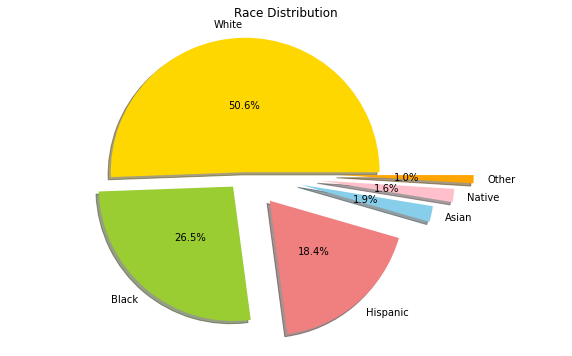

In [11]:
plt.figure(figsize=(10,6))
color_list = ['gold', 'yellowgreen', 'lightcoral','skyblue', 'pink','orange']
data.race.value_counts().plot.pie(autopct='%1.1f%%',shadow=True,pctdistance = 0.5,colors=color_list,explode=np.linspace(0,0.7,6))
plt.title("Race Distribution")
plt.ylabel('')
plt.axis('equal')
plt.show()

Graph 4 : Pie Chart for Distribution of Arms Categories

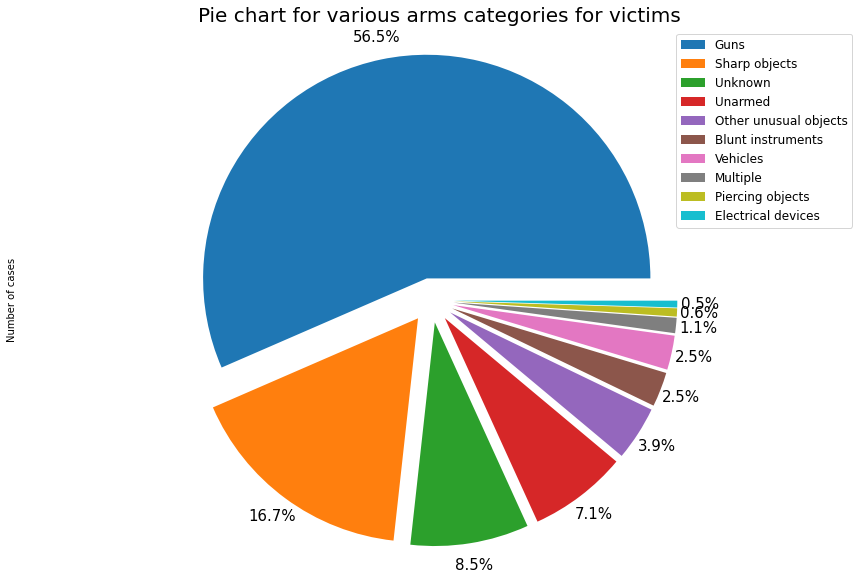

In [12]:
df_arm_cat = pd.DataFrame(data["arms_category"].value_counts(),data["arms_category"].unique())
df_arm_cat.rename(columns={'arms_category':'Number of cases'}, inplace= True)
df_arm_cat.index.name='arms_category'
df_arm_cat.sort_values(by = 'Number of cases', ascending=False, inplace= True)

textprops = {"fontsize":15}
explode_list = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
df_arm_cat[df_arm_cat['Number of cases']>20]['Number of cases'].plot(kind='pie', 
                                                                     figsize=(15, 10), autopct='%0.1f%%',
                                                                     startangle= 0, labels=None,
                                                                     pctdistance = 1.1,
                                                                     explode= explode_list,
                                                                     textprops = {"fontsize":15}
                                                                     )

plt.title('Pie chart for various arms categories for victims', size = 20)
plt.legend(labels = df_arm_cat.index, loc = 'upper right',fontsize = 12)
plt.axis('equal')
plt.show()

Graph 5 : Donut Chart for Gender Distribution

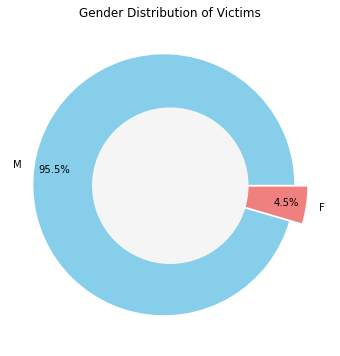

In [13]:
gen_cat = data['gender'].unique()
plt.figure(figsize=(15,6))  
gen_count = data['gender'].value_counts()
  
# colors
colors = ['skyblue','lightcoral']
# explosion
explode = (0.05, 0.05)
  
# Pie Chart
plt.pie(gen_count, colors=colors, labels=gen_cat,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='whitesmoke')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Gender Distribution of Victims')

# Displaing Chart
plt.show()

Graph 6 : Waffle Chart for Percentage Distribution of Fleeing State

In [14]:
pip install pywaffle

Note: you may need to restart the kernel to use updated packages.


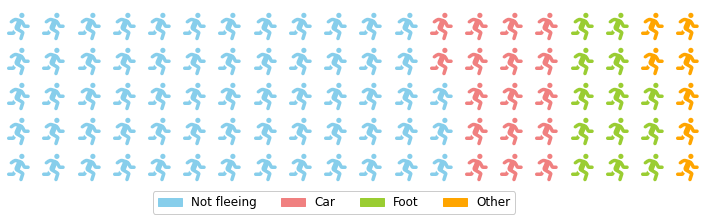

In [15]:
# importing all necessary requirements
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle
  
# creation of a dataframe
data1 ={'Fleeing': ['Not fleeing', 'Car', 'Foot', 'Other'],
       'Count': [62.8, 16.8, 13.1, 7.4]
     }
  
df = pd.DataFrame(data1)
  
# To plot the waffle Chart
fig = plt.figure(
    FigureClass = Waffle,
    figsize = (10,5),
    rows = 5,
    values = df.Count,
    labels = list(df.Fleeing),
    legend = {'loc': 'lower left',
              'bbox_to_anchor': (0.2, -0.25), 'ncol': len(df),
              'framealpha': 1, 'fontsize': 12},
    icons = 'running',
    icon_size = 28,
    colors = ('skyblue', 'lightcoral', 'yellowgreen', 'orange')
)

Graph 7 : Bar Graph for Shooting Incidents

In [16]:
data["incident_year"] = pd.to_datetime(data.date).dt.year

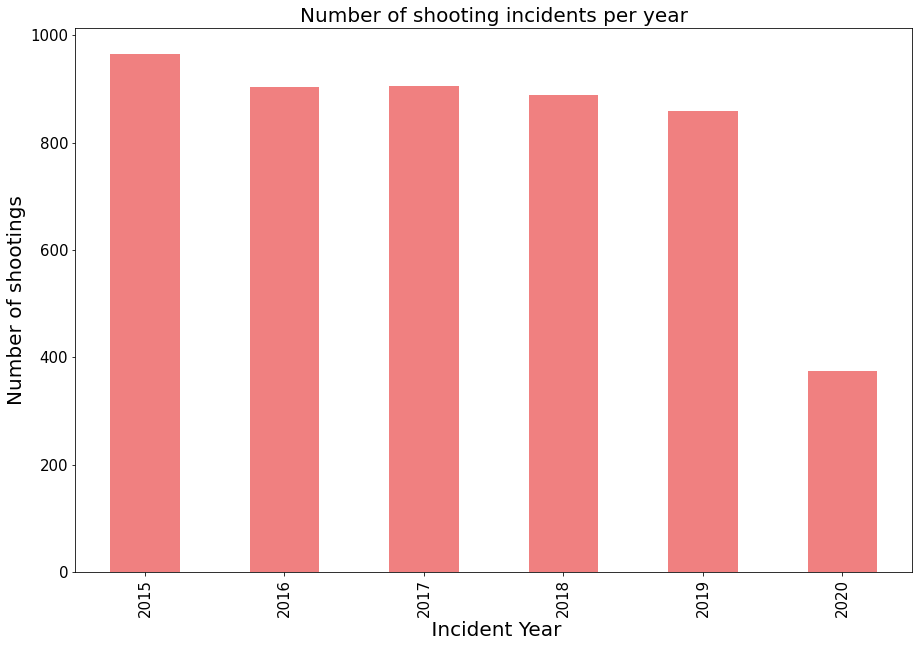

In [17]:
plt.figure(figsize=(15,10))
data.groupby("incident_year").id.count().plot(kind="bar", color = "lightcoral")
plt.title("Number of shooting incidents per year", size=20)
plt.ylabel('Number of shootings', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(' Incident Year',size = 20)
plt.show()

Graph 8 : Bar Graph for Top 20 Cities on the basis of Shooting Count

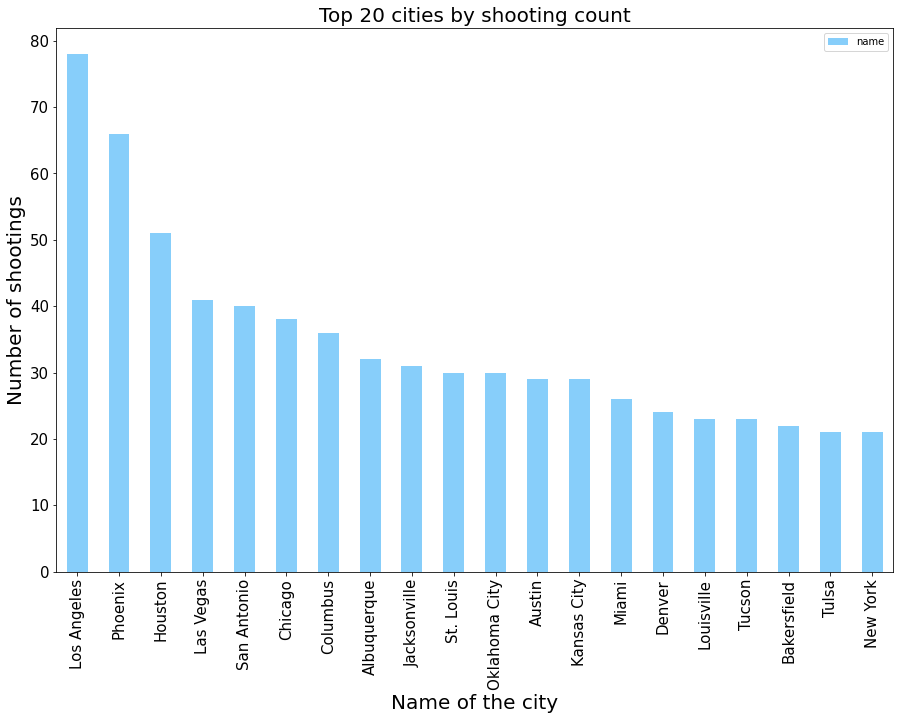

In [18]:
city = data.groupby('city')['name'].count().reset_index().sort_values('name', ascending=False).head(20)
city.set_index('city', inplace = True)
city.plot(kind="bar", figsize=(15,10), color="lightskyblue")
plt.title("Top 20 cities by shooting count", size=20)
plt.ylabel('Number of shootings',size=20)
plt.xlabel('Name of the city', size=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

Graph 9 : Map for Number of Shooting Incidents Statewise

In [19]:
state = data.groupby('state')['name'].count().reset_index().sort_values('name', ascending=False).head(50)
state.reset_index(drop = True, inplace = True)

In [20]:
us1 = pd.read_json("us_states.json")
us1.rename(columns = {"name":"state_name","abbreviation":"state"}, inplace=True)

In [21]:
state = state.merge(us1,how="inner",on="state")

In [22]:
us2 = json.load(open("gz_2010_us_040_00_5m.json","r"))

In [23]:
csv = pd.read_csv("state_latlong.csv")
csv.drop(columns="name",inplace=True)

In [24]:
state=state.merge(csv, how="inner", on = "state")

In [25]:
#pip install -U folium

In [26]:
us_map = folium.Map(location=[39.572, -98.201], zoom_start=4)
us_map.choropleth(geo_data = us2,
                    data = state,
                    columns = ['state_name', 'name'],
                    key_on = 'feature.properties.NAME',
                    fill_color = "BuPu",
                    fill_opacity = 0.7,
                    line_opacity = 0.2,
                    legend_name = 'Shooting incidents by states')

shootings = folium.map.FeatureGroup()

for lat, lng in zip(state.latitude, state.longitude):
    shootings.add_child(folium.CircleMarker([lat,lng],
                                            radius = 5,
                                            color = 'blue',
                                            fill = True,
                                            fill_color = 'white',
                                           fill_opacity = 0.7))
lats= list(state.latitude)
lngs = list(state.longitude)
label = list(state.name)

for lat, lng, label in zip(lats, lngs, label):
    folium.Marker([lat, lng], popup = label).add_to(us_map)   

    us_map.add_child(shootings)

us_map

/opt/anaconda3/lib/python3.8/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


Graph 10 : Line Graph for Distribution of States based on Mental Illness and Total shootings

In [27]:
us_states = pd.read_json("us_states.json")
us_states.rename(columns = {"name":"state_name","abbreviation":"state"}, inplace=True)
df_mental = data.groupby(['state', 'signs_of_mental_illness']).count().iloc[:, [0]].reset_index()
df_mental.reset_index(drop = True, inplace = True)
df_men1 = df_mental.merge(us_states, how="inner",on="state")
df_men1.sort_values('id', ascending = False)

state  signs_of_mental_illness   id            state_name
8     CA                    False  539            California
85    TX                    False  348                 Texas
18    FL                    False  235               Florida
6     AZ                    False  180               Arizona
9     CA                     True  162            California
..   ...                      ...  ...                   ...
17    DE                     True    3              Delaware
92    VT                     True    3               Vermont
57    ND                     True    2          North Dakota
43    ME                     True    2                 Maine
15    DC                     True    2  District Of Columbia

[101 rows x 4 columns]

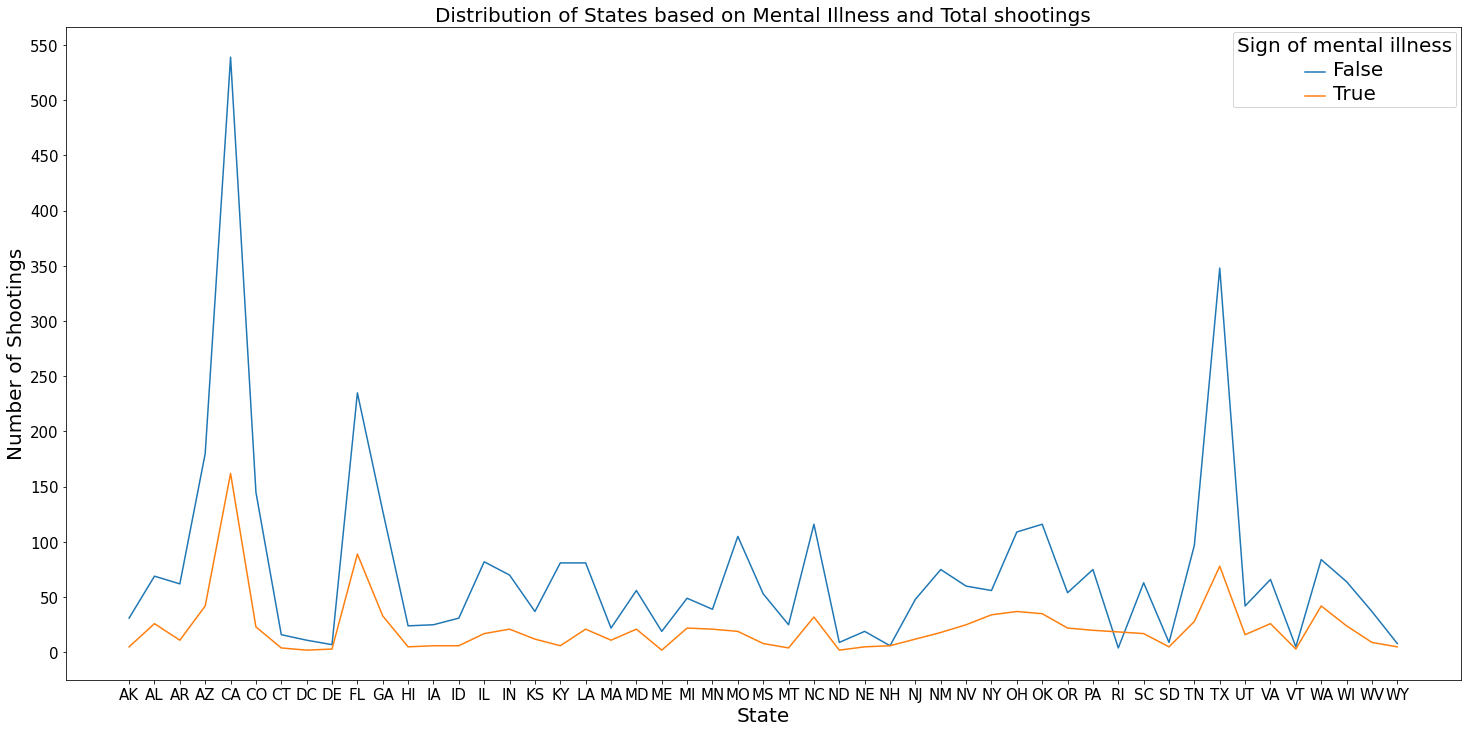

In [28]:
plt.figure(figsize=(25,12))
ax = sns.lineplot(x="state", y="id",hue='signs_of_mental_illness',data=df_men1)
plt.xlabel("State", size=20)
plt.ylabel("Number of Shootings", size=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.title('Distribution of States based on Mental Illness and Total shootings', size = 20)
plt.legend().set_title('Sign of mental illness')

plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20')

plt.yticks(np.arange(0,600,50))
plt.show()

Graph 11 : Bar Graph for Distribution of Incidents based on Manner of Death and Gender

In [29]:
df_man = data.groupby(['gender','manner_of_death']).count().iloc[:, [0]].reset_index().sort_values('id', ascending=False).head(50)
df_man.reset_index(drop = True, inplace = True)
df_man.rename(columns={"gender":"Gender","manner_of_death":"Manner of Death","id":"Count"},inplace = True)

In [30]:
fig = px.bar(df_man,x="Manner of Death", y="Count" ,color="Gender",hover_name="Gender")
fig.update_layout(barmode='group')
fig.update_layout(font=dict(
        #family="Courier New, monospace",
        size=15,
       # color="RebeccaPurple"
    )
)
fig.show()

Graph 12 : BodyCam's State during Shootings

In [31]:
df_camon = data.groupby(['arms_category','body_camera']).count().iloc[:, [0]].reset_index().sort_values('id', ascending=False).head(50)
df_camon.reset_index(drop = True, inplace = True)
df_camon.head(20)

arms_category  body_camera    id
0                    Guns        False  2470
1           Sharp objects        False   699
2                 Unknown        False   385
3                    Guns         True   294
4                 Unarmed        False   293
5   Other unusual objects        False   158
6           Sharp objects         True   119
7                Vehicles        False   112
8       Blunt instruments        False   103
9                 Unarmed         True    55
10               Multiple        False    49
11  Other unusual objects         True    34
12                Unknown         True    33
13       Piercing objects        False    25
14      Blunt instruments         True    19
15     Electrical devices        False    19
16               Vehicles         True     9
17               Multiple         True     5
18     Electrical devices         True     5
19       Piercing objects         True     4

In [32]:
df_camon.rename(columns={"arms_category": "Arms Category", "body_camera": "Body Camera On?", "id":"Number of Shootings"}, inplace = True)
df_camon.head()

Arms Category  Body Camera On?  Number of Shootings
0           Guns            False                 2470
1  Sharp objects            False                  699
2        Unknown            False                  385
3           Guns             True                  294
4        Unarmed            False                  293

In [33]:
import plotly.express as px


fig = px.bar(df_camon, x="Arms Category", y="Number of Shootings", color="Body Camera On?")

legendnames = {'False':'No', 'True': 'Yes'}
fig.for_each_trace(lambda x: x.update(name = legendnames[x.name],
                                      legendgroup = legendnames[x.name],
                                      hovertemplate = x.hovertemplate.replace(x.name, legendnames[x.name])
                                     )
                  )
fig.update_layout(font=dict(
        size=15,
    )
)
fig.show()

# Conclusion

1. Most of the shooting victims were white male and the age range of the victims was 25 to 45
2. In various incidents, the police officer’s body camera was turned off when the victim was armed.
3. Very few shooting incidents involved a mentally unstable or fleeing victim.
